In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
X_train_smote = pickle.load(open("X_train_smote.p", "rb"))
X_test = pickle.load(open("X_test.p", "rb"))
y_train_smote = pickle.load(open("y_train_smote.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb" ))


In [3]:
n_estimators = range(100, 1000, 50)
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
gamma = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
max_depth = [1,2]
param = dict(n_estimators=n_estimators,
             learning_rate = learning_rate,
             gamma = gamma,
             max_depth = max_depth )

In [4]:
XGclf = xgb.XGBClassifier()
XGclf_Rand = RandomizedSearchCV(XGclf, param, cv = 5, scoring = 'roc_auc')

In [5]:
XGclf_Rand.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [6]:
XGclf_Rand.best_params_

{'n_estimators': 800, 'max_depth': 2, 'learning_rate': 0.3, 'gamma': 1.75}

In [7]:
XGclf_Rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
XGclf1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                           importance_type='gain', interaction_constraints='',
                           learning_rate=0.5, max_delta_step=0, max_depth=2,
                           min_child_weight=1, monotone_constraints='()',
                           n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
                           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                           tree_method='exact', validate_parameters=1, verbosity=None)
XGclf1.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred4 = XGclf1.predict(X_test)
XGclf1_predict_proba = XGclf1.predict_proba(X_test)

In [10]:
# c) Calculate the confusion matrix and classification report 
# d) Calculate the AUC score
print(classification_report(y_test, y_pred4))
print("accuracy score is :", accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     26535
           1       0.17      0.18      0.17      3313

    accuracy                           0.81     29848
   macro avg       0.53      0.53      0.53     29848
weighted avg       0.82      0.81      0.81     29848

accuracy score is : 0.8074242830340391


In [11]:
XGclf1_pred = XGclf1_predict_proba[:,1]
print(roc_auc_score(y_test, XGclf1_pred))

0.5963997570027365


In [12]:
names = ['number_inpatient',
 'discharge_disposition_id',
 'number_emergency',
 'num_medications',
 'time_in_hospital',
 'num_lab_procedures',
 'DXDiabetes',
 'number_outpatient',
 'DXHypertension',
 'number_diagnoses',
 'DXHTN_Kidney',
 'insulin_Down',
 'DXHeartFailure',
 'DXResp',
 'insulin_No',
 'diabetesMed_No',
 'Med_Spec_Cardiology',
 'DXLipid',
 'DXHeartDisease',
 'insulin_Up',
 'metformin_Steady',
 'age_50-60)',
 'Med_Spec_Nephrology',
 'num_procedures',
 'Med_Spec_Other',
 'change_Ch',
 'DXDevice',
 'age_10-20)',
 'change_No',
 'diabetesMed_Yes',
 'age_20-30)',
 'admission_type_id',
 'age_0-10)',
 'DXFluid',
 'age_80-90)',
 'max_glu_serum_300',
 'DXPneumonia',
 'A1Cresult_Norm',
 'A1Cresult_8',
 'metformin_No']

<AxesSubplot:>

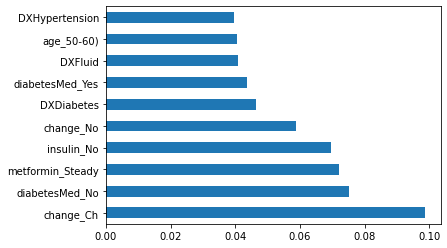

In [13]:
XGclf_best = XGclf_Rand.best_estimator_
(pd.Series(XGclf_best.feature_importances_, names)
   .nlargest(10)
   .plot(kind='barh'))

In [14]:
# f) predict for the train data. 
y_pred_train = XGclf1.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train))
print("accuracy score is :", accuracy_score(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     61788
           1       0.88      0.83      0.86     61788

    accuracy                           0.86    123576
   macro avg       0.86      0.86      0.86    123576
weighted avg       0.86      0.86      0.86    123576

accuracy score is : 0.8609681491551757


In [15]:
#feature importance

feature_importances = pd.DataFrame(XGclf_best.feature_importances_,
                                   index = names,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
change_Ch,0.098632
diabetesMed_No,0.075051
metformin_Steady,0.072154
insulin_No,0.069620
change_No,0.058846
DXDiabetes,0.046286
diabetesMed_Yes,0.043542
DXFluid,0.040955
age_50-60),0.040682
DXHypertension,0.039759
